# Aplicación del TCL y LGN

In [4]:
import numpy as np
import pandas as pd #Manejo y manipulacion de datos
import matplotlib.pyplot as plt
import seaborn as sns #Visualizacion de datos

## Simulación de la LGN

Simualaremos los lanzamientos de un dado y calcularemos la media 

$$ \Omega = \{ 1,2,3,4,5,6, \}$$

La media teórica : $$\mathbb{E}[X] = 3.5$$

In [35]:
np.random.seed(42) # numeros pseudoaletorios sean reproducibles
lanzamientos = np.random.randint(1,7,10000)

In [52]:
media_acum = np.cumsum(lanzamientos) / np.arange(1,10001)
df = pd.DataFrame( {
    'Lanzamiento': np.arange(1,10001),
    'Media Acumulada': media_acum } )

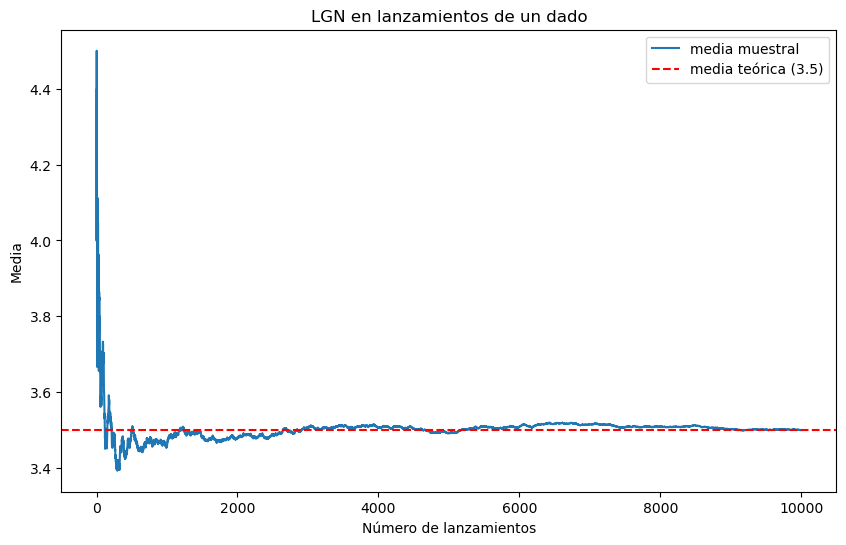

In [39]:
plt.figure(figsize=(10,6))
plt.plot(df['Lanzamiento'], df['Media Acumulada'], label='media muestral')
plt.axhline(3.5, color= 'red', linestyle='--', label='media teórica (3.5)')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Media')
plt.title('LGN en lanzamientos de un dado')
plt.legend()
plt.show()

## Problema de la Ajuga de Bufon

Estimación de pi: 3.1483667847304213


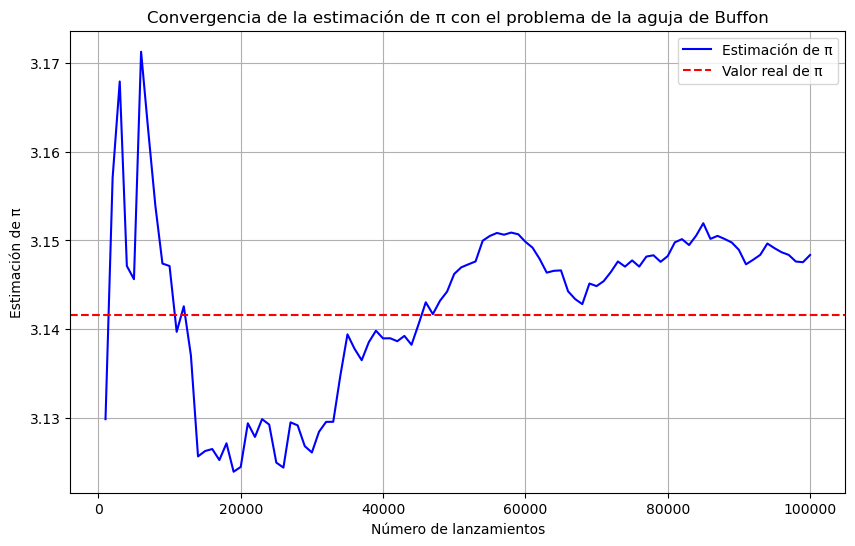

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
L = 1.0  # Longitud de la aguja
d = 1.0  # Distancia entre las líneas paralelas
num_trials = 100000  # Número total de lanzamientos
step = 1000  # Número de lanzamientos por paso para la estimación de pi

# Listas para almacenar los valores de pi estimados y los lanzamientos
pi_estimates = []
trial_steps = []

# Contador para cuántas agujas cruzan una línea
crossed_lines = 0

# Simulación de lanzamientos de la aguja y estimación de pi en pasos
for trial in range(1, num_trials + 1):
    # Posición del centro de la aguja
    center_position = np.random.uniform(0, d / 2)

    # Ángulo aleatorio entre 0 y pi (ángulo en radianes)
    angle = np.random.uniform(0, np.pi)

    # Distancia desde el centro de la aguja hasta la línea más cercana
    distance_to_nearest_line = L / 2 * np.sin(angle)

    # Verificamos si la aguja cruza una línea
    if center_position <= distance_to_nearest_line:
        crossed_lines += 1

    # Estimación de pi en pasos
    if trial % step == 0 and crossed_lines > 0:
        pi_estimate = (2 * L * trial) / (crossed_lines * d)
        pi_estimates.append(pi_estimate)
        trial_steps.append(trial)

print(f"Estimación de pi: {pi_estimate}")

# Plot de la estimación de pi a lo largo de los lanzamientos
plt.figure(figsize=(10, 6))
plt.plot(trial_steps, pi_estimates, label="Estimación de π", color="blue")
plt.axhline(y=np.pi, color="red", linestyle="--", label="Valor real de π")
plt.xlabel('Número de lanzamientos')
plt.ylabel('Estimación de π')
plt.title('Convergencia de la estimación de π con el problema de la aguja de Buffon')
plt.legend()
plt.grid(True)
plt.show()

## Aplicación del TCL

C:\Users\Mi Pc\AppData\Local\Temp\ipykernel_7748\2642847893.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_muestra_medias)


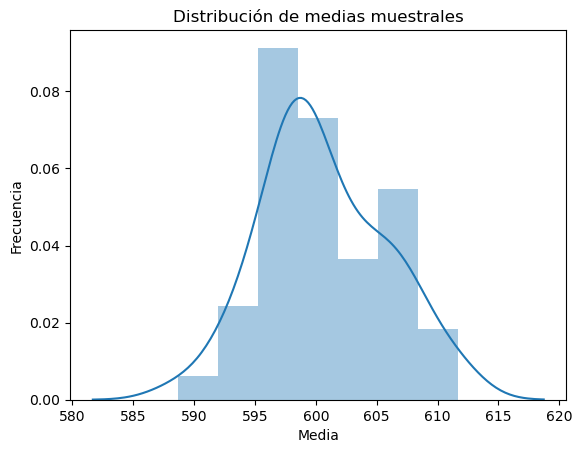

In [85]:
# Crear el DataFrame con 50 muestras, cada una con 10 observaciones de una binomial(n=1000, p=0.6)
df = pd.DataFrame()

for i in range(1,51):
  muestra = np.random.binomial(1000,0.6,10)  # Muestra aleatoria de binomiales de 10 éxitos, se realiza 1000 veces el experimento 
  col = f"muestra {i}"
  df[col] = muestra

df.head(5)  # Mostrar las primeras 5 filas

# Calcular el promedio de cada muestra
df_muestra_medias = pd.DataFrame(df.mean(), columns=["Media de la muestra"])

# Visualizar la distribución de las medias
sns.distplot(df_muestra_medias)
#sns.histplot(df_muestra_medias["Media de la muestra"], kde=True)
plt.title("Distribución de medias muestrales")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.show()